# Применение логистической регрессии для решения задачи классификации

# Описание набора данных

Данный набор содержит информацию о пассажирах корабля «Титаник», затонувшего в ночь на 15-е апреля 1912 года. Некоторое количество пассажиров спаслось, чему способствовало множество различных факторов, включая их пол, возраст, на какой палубе находилась их кабина, социальный статус, и т.д.

Набор данных состоит из различных признаков, описывающих информацию о пассажирах. Каждая строка таблицы — отдельный пассажир, вся информация о нем содержится в его строке. 

Описание датасета:
- **Survived** (целевой признак): выжил ли пассажир (0 = Нет, 1 = Да);
- **Pclass**: класс каюты (1 = 1st, 2 = 2nd, 3 = 3rd);
- **Sex**: пол (female или male)	
- **Age**: возраст в годах
- **SibSp**: количество братьев, сестёр (в том числе сводных) и супругов на борту	
- **Parch**: количество детей и родителей на борту
- **Ticket**: номер билета	
- **Fare**: стоимость проезда пассажира	
- **Cabin**: номер каюты	
- **Embarked**: порт посадки пассажира (C = Cherbourg, Q = Queenstown, S = Southampton).

Необходимо решить задачу классификации и научиться предсказывать целовой признак **Survived** — выживет ли пассажир — по соответсвующим ему нецелевым признакам.


# Подготовка и первичный анализ данных

In [294]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Установите количество пропущенных значений поля <code>age</code>:

In [295]:
df = pd.read_csv("C:/Users/Соня/OneDrive/Рабочий стол/jupyter/ml_online_course/log_reg/titanic_train.csv")
len(df) - len(df['age'].dropna())
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,"Co Clare, Ireland Washington, DC"
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,NaN
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,NaN
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,A. 2. 39186,8.0500,NaN,S,NaN
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S,"England Oglesby, IL"
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S,"Vancouver, BC"
979,3,0,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,"England New York, NY"


Определите долю выживших

<AxesSubplot:xlabel='survived', ylabel='count'>

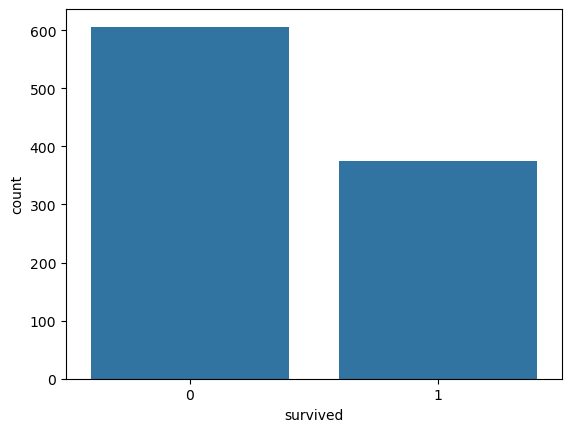

In [296]:
sns.countplot(x = 'survived', data = df, legend = 'full')

Определите долю пропущенных значений в рамках каждого признака и избавьтесь от тех признаков, где доля пропусков больше трети. Также удалите колонку <code>ticket</code>, вряд ли эта информация будет полезной.

In [297]:
col = df.columns
for i in col:
    if len(df) - len(df[i].dropna()) > len(df) / 3:
        print(i)

cabin
home.dest


In [298]:
data = df.drop(['cabin', 'home.dest', 'ticket'], axis=1)
data

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,7.2292,C
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,7.8958,S
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,9.5000,S
...,...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,0,0,8.0500,S
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,0,0,8.0500,S
978,2,0,"Gillespie, Mr. William Henry",male,34.0,0,0,13.0000,S
979,3,0,"Barton, Mr. David John",male,22.0,0,0,8.0500,S


In [299]:
data.head(15)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,7.2292,C
3,3,0,"Vovk, Mr. Janko",male,22.0,0,0,7.8958,S
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,9.5000,S
5,3,1,"Daly, Mr. Eugene Patrick",male,29.0,0,0,7.7500,Q
6,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,7.2500,S
7,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,26.0000,C
8,3,0,"Danoff, Mr. Yoto",male,27.0,0,0,7.8958,S
9,3,0,"Asplund, Master. Filip Oscar",male,13.0,4,2,31.3875,S


Из описания набора данных видно, что колонки <code>sibsp</code> и <code>parch</code> по сути отвечают за размер семьи. Замените эти две колонки на колонку <code>fam_size</code>, значения которой будут вычисляться как сумма соответствующих значений в колонках <code>sibsp</code> и <code>parch</code>. 

In [300]:
data['fam_size'] = data['sibsp'] + data['parch']
data = data.drop(['sibsp', 'parch'], axis=1)

In [301]:
data['fam_size'].mean()

0.8664627930682977

In [302]:
data

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


Полученный датасет будем называть **исходным** (выброшенные на этом этапе признаки не нужно возвращать ни на одном из последующих этапов выполнения задания). Вычислите полученное число предикторов.

## data - исходный 

In [208]:
7

7

In [209]:
data

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


На основе имеющейся статистики оцените вероятность выжить если пассажир -- представитель определенной категории (указана в вашем индивидуальном задании)

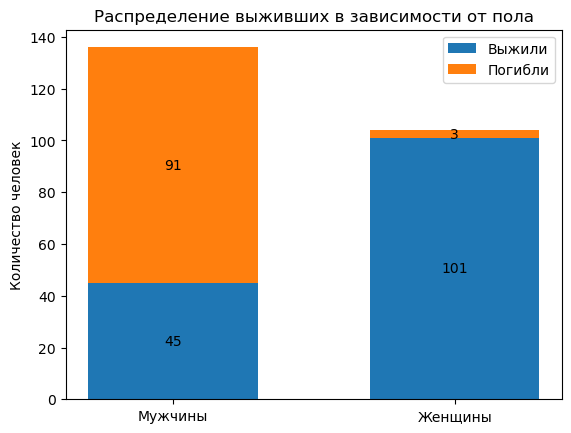

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(df.loc[(df['sex'] == 'male') & (data['pclass'] == 1)])
females_total = len(df.loc[(df['sex'] == 'female') & (data['pclass'] == 1)])
males_survived = len(df.loc[((df['sex'] == 'male') & (data['pclass'] == 1) & (df['survived'] == 1))])
females_survived = len(df.loc[((df['sex'] == 'female') & (data['pclass'] == 1) & (df['survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()


In [64]:
len(data[(data['sex'] == 'female') & (data['pclass'] == 1) & (data['survived'] == 1)]) / len(data[(data['sex'] == 'female') & (data['pclass'] == 1)])

0.9711538461538461

Постройте гистограммы выжиших и невыживших по возрастам.

(array([33., 23., 81., 66., 49., 32., 23.,  9.,  0.,  2.]),
 array([ 0.4167 ,  8.37503, 16.33336, 24.29169, 32.25002, 40.20835,
        48.16668, 56.12501, 64.08334, 72.04167, 80.     ]),
 <BarContainer object of 10 artists>)

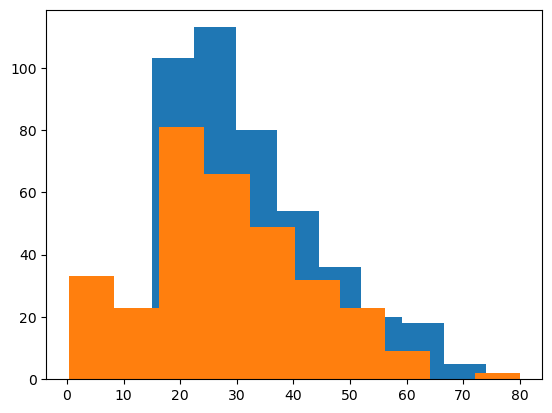

In [63]:
plt.hist(x = data[data['survived'] == 0]['age'])
plt.hist(x = data[data['survived'] == 1]['age'])

# Модель на основе числовых признаков

## Удаление строк с пропусками

В качестве базовой модели имеет смысл построить модель с минимальными трудозатратами.

Из исходного датасета удалите все категориальные признаки, а также строки, содержащие пропуски.

При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки<b> с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>survived</code>.

Обучите модель <code>LogisticRegression()</code> <b>с параметрами, указанными в вашем задании</b>, на тренировочных данных, оцените на тестовых.

Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию.



In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    981 non-null    int64  
 1   survived  981 non-null    int64  
 2   name      981 non-null    object 
 3   sex       981 non-null    object 
 4   age       782 non-null    float64
 5   fare      981 non-null    float64
 6   embarked  981 non-null    object 
 7   fam_size  981 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 61.4+ KB


In [211]:
data_drop = data.drop(columns = ['name', 'sex', 'embarked'], axis = 1)

In [213]:
data_drop

,pclass,survived,age,fare,fam_size
0,3,1,NaN,7.7333,0
1,3,1,NaN,7.7500,0
2,3,1,38.0,7.2292,0
3,3,0,22.0,7.8958,0
4,3,0,16.0,9.5000,0
...,...,...,...,...,...
976,3,1,NaN,8.0500,0
977,3,1,19.0,8.0500,0
978,2,0,34.0,13.0000,0
979,3,0,22.0,8.0500,0


In [214]:
data_drop = data_drop.dropna()
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 2 to 980
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    782 non-null    int64  
 1   survived  782 non-null    int64  
 2   age       782 non-null    float64
 3   fare      782 non-null    float64
 4   fam_size  782 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 36.7 KB


In [215]:
y = data_drop['survived']
X = data_drop.drop(columns = 'survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=11, 
    stratify=y)

In [216]:
model = LogisticRegression(random_state=11, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.5471698113207547

## Заполнение пропусков средним

Качество полученной модели оставляет желать лучшего. Имеет смысл попробовать заполнить пропуски. Из исходного набора данных удалите категориальные признаки, а пропуски заполните средним по столбцу. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [254]:
data

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [236]:
df_only_numeric = data.select_dtypes(include=np.number)

df_only_numeric.fillna(df_only_numeric.mean(), inplace=True)

y = df_only_numeric['survived']
X = df_only_numeric.drop('survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=random_state,
                                                    test_size=test_size, 
                                                    stratify=y)
lre = LogisticRegression(random_state=random_state, max_iter=max_iter)
lre.fit(x_train, y_train)
y_pred = lre.predict(x_test)
print('f1_score = ', f1_score(y_test, y_pred))

f1_score =  0.4297520661157025


## Заполнение пропусков на основе обращения


Очевидно, что заполнение пропусков в колонке <code>age</code> средним — не самая разумная идея. Возможно, стоит выполнить эту процедуру как-то более интеллектуально, например, с оглядкой на обращение к человеку. 

Можно заметить, что исходный датасет в столбце <code>name</code> содержит информацию о социальном статусе пассажира, а именно присутсвуют обращения <code>Mr., Mrs., Dr.</code> и т.д. На основе этой информации можно попробовать сделать предположение о возрасте пассажира.

Верните в рассмотрение колонку <code>name</code>. Создайте отдельную колонку <code>honorific</code> и поместите туда значения обращений.

Вычислите число уникальных обращений.

In [253]:
data_name

,pclass,survived,name,age,fare,fam_size,honorific
0,3,1,"Smyth, Miss. Julia",NaN,7.7333,0,Miss
1,3,1,"Glynn, Miss. Mary Agatha",NaN,7.7500,0,Miss
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",38.0,7.2292,0,Mrs
3,3,0,"Vovk, Mr. Janko",22.0,7.8958,0,Mr
4,3,0,"de Pelsmaeker, Mr. Alfons",16.0,9.5000,0,Mr
...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",NaN,8.0500,0,Miss
977,3,1,"Dorking, Mr. Edward Arthur",19.0,8.0500,0,Mr
978,2,0,"Gillespie, Mr. William Henry",34.0,13.0000,0,Mr
979,3,0,"Barton, Mr. David John",22.0,8.0500,0,Mr


In [239]:
import re

In [245]:
data_name = data.drop(columns = ['sex', 'embarked'], axis = 1)
data_name['honorific'] =  data_name['name'].apply(lambda x: re.search(r' (\S+?)\. ', x).group(1))
len(data_name['honorific'].unique())

14

Скорее всего имеет смысл сократить число обращений, добавив малочисленные группы к более многочисленным, так как принципиальной разницы между, например, <code>Don</code> и <code>Mr</code>, видимо, нет. Отметим, что <code>Master</code> — это прежнее обращение к ребенку, с этим обращением будем работать отдельно.




Выполните следующие замены:

<code>Mr</code> $\leftarrow$ <code>['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt']</code>

<code>Mrs</code> $\leftarrow$ <code> ['Dona', 'Countess']</code>

<code>Miss</code> $\leftarrow$ <code> ['Mlle', 'Ms']</code>

In [250]:
data_name['honorific'].unique()

array(['Miss', 'Mrs', 'Mr', 'Master', 'Mlle', 'Rev', 'Ms', 'Col', 'Dona',
       'Dr', 'Countess', 'Major', 'Don', 'Capt'], dtype=object)

Вычислите долю строк со значением <code>Master</code> относительно числа всех мужчин

In [256]:
print('Вычислите долю строк со значением Master относительно числа всех мужчин:',
      len(data_name[(data_name['honorific'] == 'Master') & (data['sex'] == 'male')]) / len(
          data_name[data['sex'] == 'male']))

Вычислите долю строк со значением Master относительно числа всех мужчин: 0.07232704402515723


In [257]:
replacements = {
    'Mr': ['Rev', 'Col', 'Dr', 'Major', 'Don', 'Capt'],
    'Mrs': ['Dona', 'Countess'],
    'Miss': ['Mlle', 'Ms']
}

def replace_name(x):
    for k in replacements:
        if (x in replacements[k]): return k

    return x

In [258]:
data_name['honorific'] =  data_name['honorific'].apply(lambda x: replace_name(x))

In [259]:
data_name

,pclass,survived,name,age,fare,fam_size,honorific
0,3,1,"Smyth, Miss. Julia",NaN,7.7333,0,Miss
1,3,1,"Glynn, Miss. Mary Agatha",NaN,7.7500,0,Miss
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",38.0,7.2292,0,Mrs
3,3,0,"Vovk, Mr. Janko",22.0,7.8958,0,Mr
4,3,0,"de Pelsmaeker, Mr. Alfons",16.0,9.5000,0,Mr
...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",NaN,8.0500,0,Miss
977,3,1,"Dorking, Mr. Edward Arthur",19.0,8.0500,0,Mr
978,2,0,"Gillespie, Mr. William Henry",34.0,13.0000,0,Mr
979,3,0,"Barton, Mr. David John",22.0,8.0500,0,Mr


Вычислите средний возраст категории, указанной в вашем индивидуальном задании

In [260]:
data_name[data_name['honorific'] == 'Miss']['age'].mean()

22.00576540880503

In [261]:
print('Вычислите средний возраст категории Miss:', data_name.groupby('honorific')['age'].mean()['Miss'])

Вычислите средний возраст категории Miss: 22.005765408805033


Заполните пропуски в колонке <code>age</code> средним, соответствующим среднему категории <code>honorific</code>.

Избавьтесь от нечисловых признаков. Далее аналогично: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [273]:
data_name['age'] = data_name.groupby('honorific')['age'].transform(lambda x: x.fillna(x.mean()))
.

SyntaxError: invalid syntax (1152540508.py, line 2)

In [275]:
data_name.drop('name', inplace=True, axis=1)

In [277]:
y = data_name['survived']
X = data_name.drop('survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=random_state,
                                                    test_size=test_size, 
                                                    stratify=y)
lre = LogisticRegression(random_state=random_state, max_iter=max_iter)
lre.fit(x_train, y_train)
y_pred = lre.predict(x_test)
print('f1_score = ', f1_score(y_test, y_pred))

f1_score =  0.43902439024390244


# Модель с использование категориальных признаков

В исходном наборе данных заполните пропуски колонки <code>age</code> значениями на основе обращений (как в предыдущем пункте).

Не используйте признаки <code>name</code> и <code>honorific</code>. Они свою функцию выполнили.

Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>. Далее по знакомой схеме: разделение, обучение, оценка.

Вычислите <code>f1_score</code> модели на тестовых данных

In [303]:
copy = data

In [304]:
copy

,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [306]:
data['honorific'] =  data['name'].apply(lambda x: re.search(r' (\S+?)\. ', x).group(1))
data['honorific'] =  data['honorific'].apply(lambda x: replace_name(x))
data['age'] = data.groupby('honorific')['age'].transform(lambda x: x.fillna(x.mean()))

In [308]:
data.drop(columns = ['name', 'honorific'], axis=1,inplace=True)

In [310]:
data = pd.get_dummies(data, drop_first=True)
data

,pclass,survived,age,fare,fam_size,sex_male,embarked_Q,embarked_S
0,3,1,22.005765,7.7333,0,False,True,False
1,3,1,22.005765,7.7500,0,False,True,False
2,3,1,38.000000,7.2292,0,False,False,False
3,3,0,22.000000,7.8958,0,True,False,True
4,3,0,16.000000,9.5000,0,True,False,True
...,...,...,...,...,...,...,...,...
976,3,1,22.005765,8.0500,0,False,False,True
977,3,1,19.000000,8.0500,0,True,False,True
978,2,0,34.000000,13.0000,0,True,False,True
979,3,0,22.000000,8.0500,0,True,False,True


In [312]:
y = data['survived']
X = data.drop('survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=11,
                                                    test_size=0.2, 
                                                    stratify=y)
lre = LogisticRegression(random_state=11, max_iter=1000)
lre.fit(x_train, y_train)
y_pred = lre.predict(x_test)
print('f1_score = ', f1_score(y_test, y_pred))

f1_score =  0.6575342465753424


## Задание 3

Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных.

In [316]:
test = pd.read_csv("C:/Users/Соня/OneDrive/Рабочий стол/jupyter/ml_online_course/log_reg/titanic_reserved.csv")
test = test.drop(['cabin', 'home.dest', 'ticket'], axis=1)
test['fam_size'] = test['sibsp'] + test['parch']
test = test.drop(['sibsp', 'parch'], axis=1)

test['honorific'] =  test['name'].apply(lambda x: re.search(r' (\S+?)\. ', x).group(1))
test['honorific'] =  test['honorific'].apply(lambda x: replace_name(x))
test['age'] = test.groupby('honorific')['age'].transform(lambda x: x.fillna(x.mean()))

test.drop(columns = ['name', 'honorific'], axis=1,inplace=True)
test = pd.get_dummies(test, drop_first=True)

In [318]:
y = data['survived']
X = data.drop('survived', axis=1)


lre = LogisticRegression(random_state=11, max_iter=1000)
lre.fit(X, y)
y_pred = lre.predict(test)
print(list(y_pred))

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]
